In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
import warnings 
warnings.filterwarnings('ignore')

## 异常检测后的RSP

In [6]:
Block1_AD = pd.read_csv('../../RSP_AD/Block 1 AD 0.003.csv')
X_rsp1_AD = Block1_AD.drop('label',axis=1)
y_rsp1_AD = Block1_AD['label']
print('X_rsp1 shape: ',X_rsp1_AD.shape)

X_rsp1 shape:  (153538, 28)


In [18]:
# 分箱
fea = X_rsp1_AD.columns
bins = 100
# 分箱
Xt_rsp1_AD = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform').fit_transform(X_rsp1_AD)
df_rsp1_AD = pd.DataFrame(data=Xt_rsp1_AD, columns=fea)
df_rsp1_AD

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,2.0,67.0,26.0,27.0,42.0,11.0,56.0,95.0,0.0,9.0,...,43.0,82.0,0.0,2.0,4.0,16.0,13.0,8.0,20.0,18.0
1,4.0,65.0,56.0,33.0,36.0,34.0,69.0,72.0,0.0,16.0,...,58.0,10.0,99.0,2.0,2.0,20.0,5.0,5.0,5.0,5.0
2,3.0,50.0,99.0,11.0,71.0,9.0,22.0,4.0,0.0,16.0,...,60.0,53.0,99.0,3.0,7.0,16.0,8.0,8.0,10.0,12.0
3,15.0,24.0,37.0,5.0,94.0,13.0,45.0,86.0,99.0,7.0,...,12.0,50.0,0.0,3.0,7.0,22.0,10.0,8.0,10.0,10.0
4,9.0,54.0,80.0,11.0,89.0,16.0,66.0,82.0,99.0,13.0,...,65.0,36.0,0.0,5.0,7.0,16.0,9.0,17.0,14.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153533,2.0,53.0,53.0,7.0,9.0,11.0,40.0,56.0,99.0,19.0,...,38.0,75.0,0.0,2.0,7.0,17.0,2.0,7.0,5.0,5.0
153534,1.0,12.0,95.0,6.0,72.0,17.0,28.0,28.0,0.0,35.0,...,26.0,52.0,0.0,4.0,5.0,17.0,3.0,7.0,6.0,5.0
153535,3.0,27.0,29.0,23.0,11.0,13.0,40.0,74.0,99.0,2.0,...,40.0,41.0,99.0,3.0,5.0,16.0,4.0,7.0,9.0,7.0
153536,26.0,60.0,14.0,35.0,15.0,63.0,45.0,61.0,99.0,38.0,...,60.0,69.0,99.0,6.0,10.0,16.0,38.0,11.0,37.0,36.0


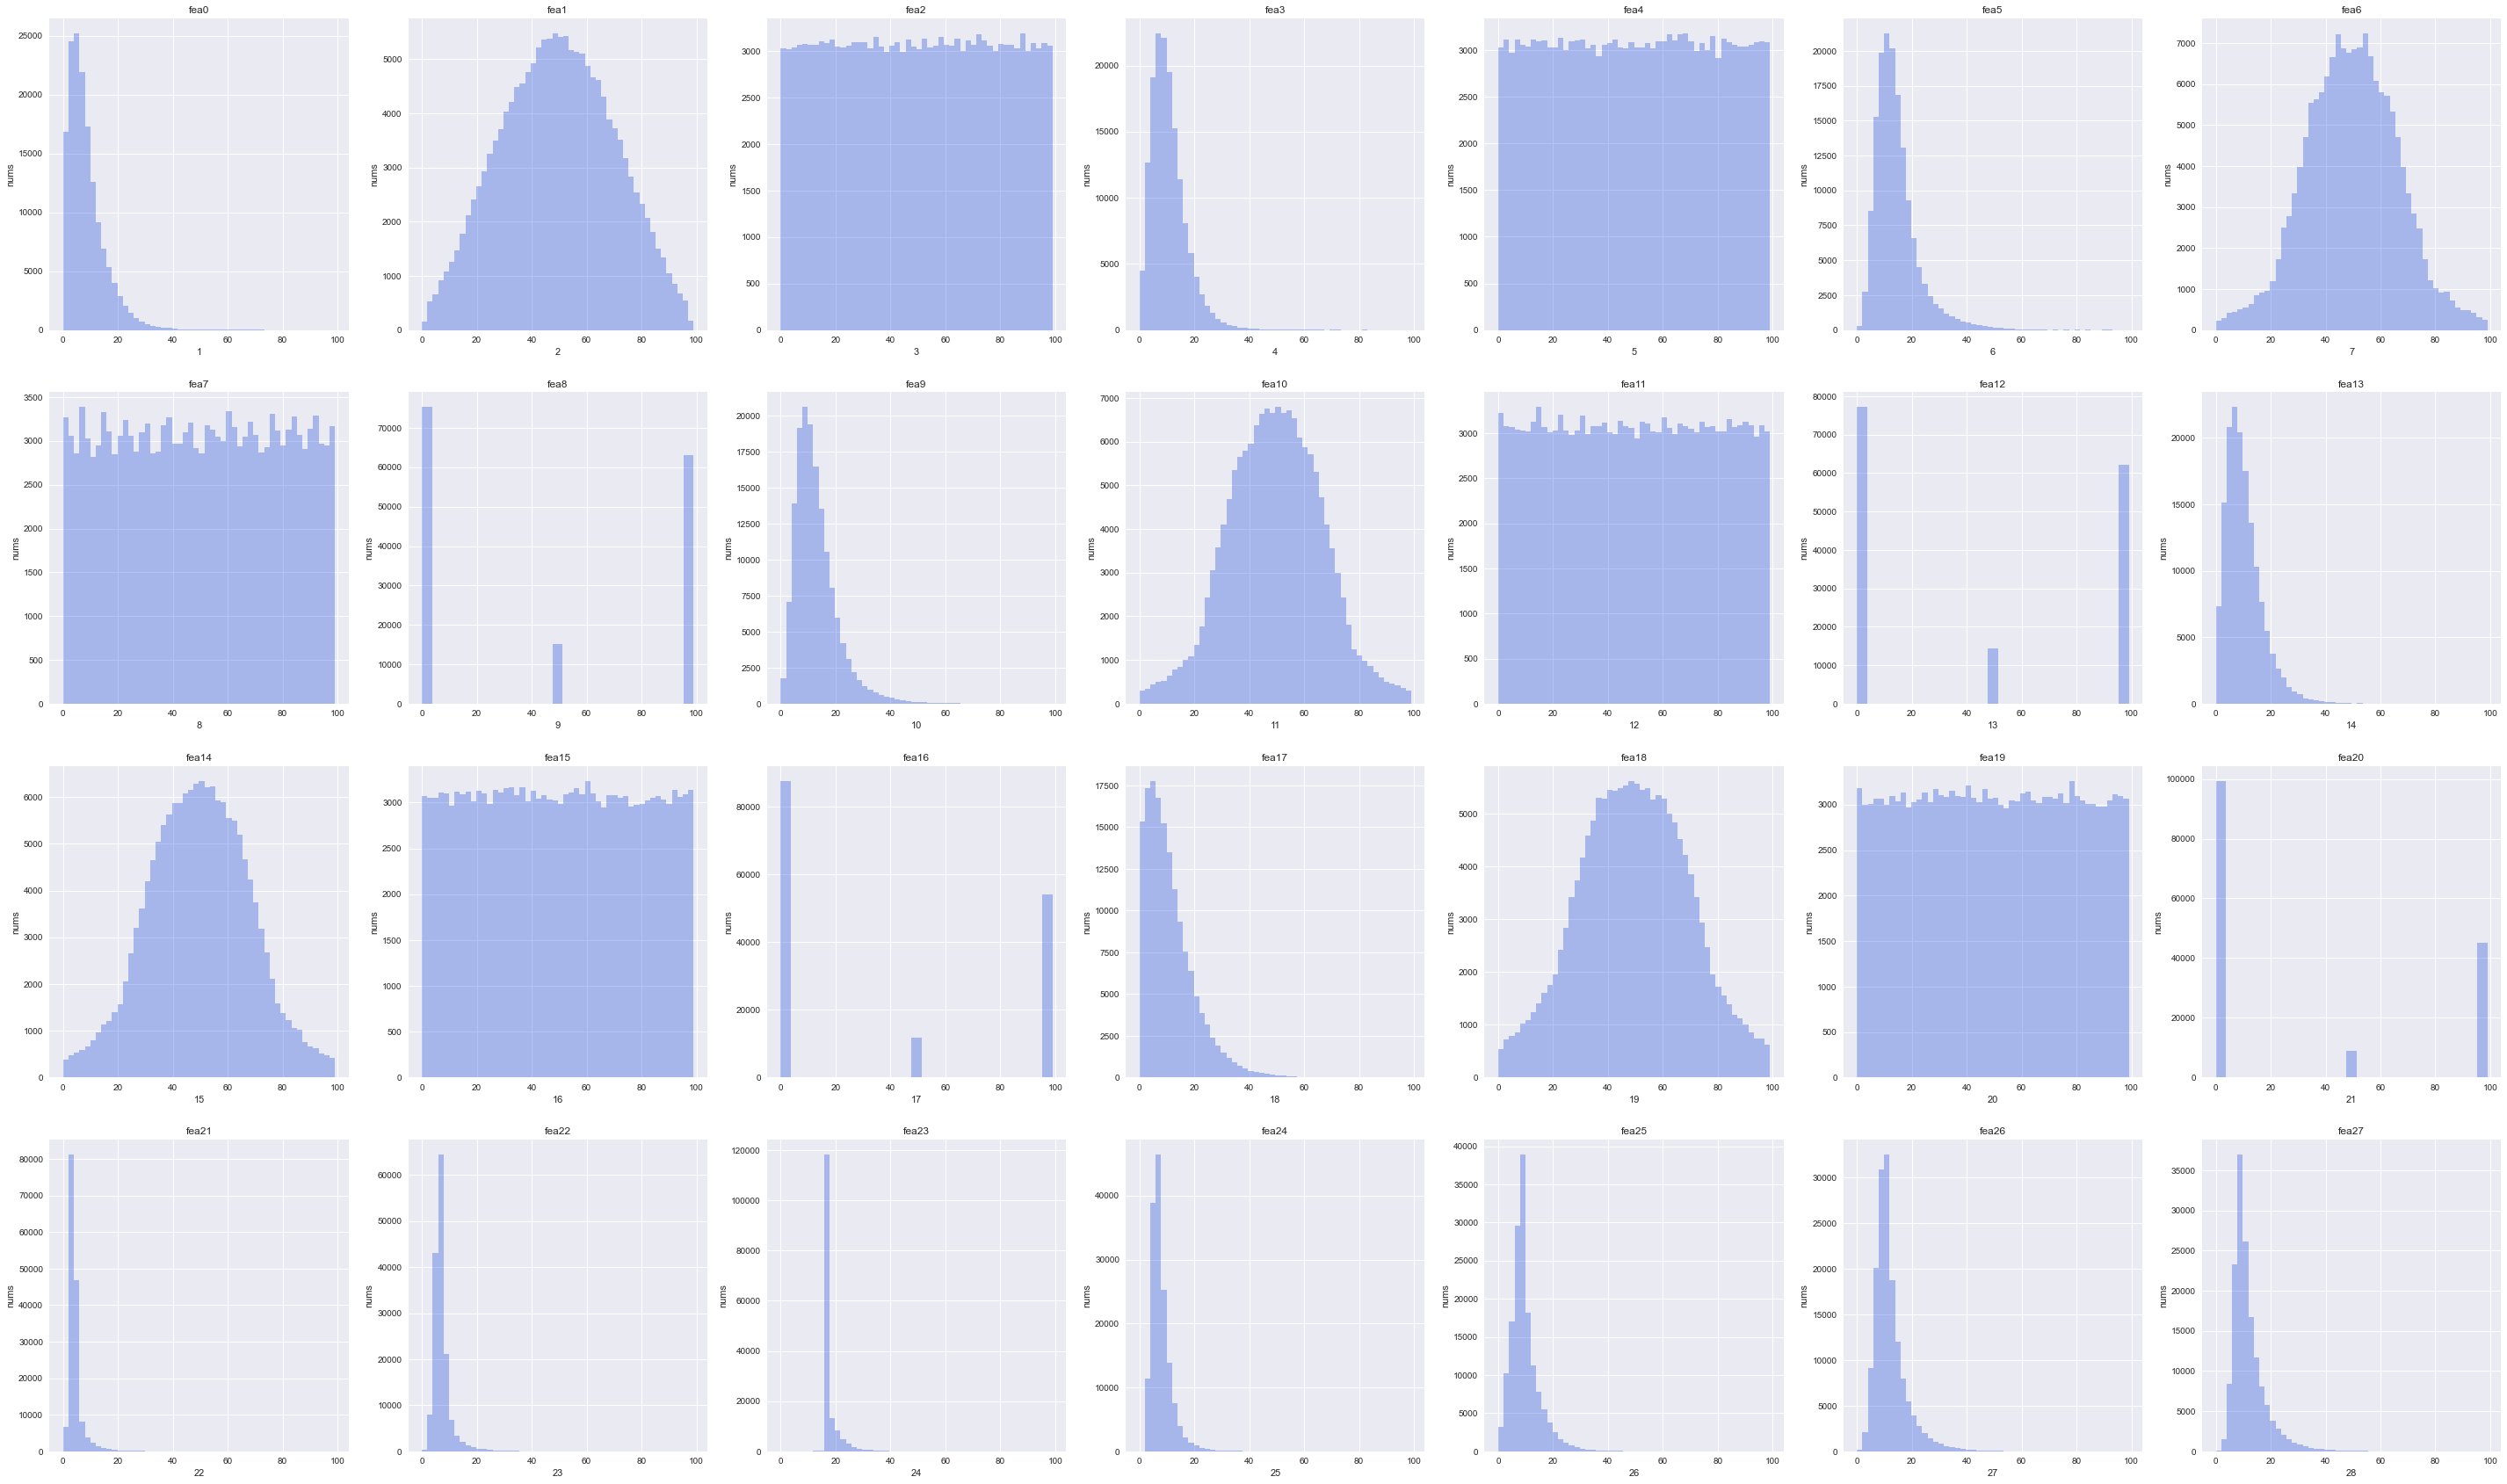

In [19]:
plt.style.use('seaborn')

fig, axes = plt.subplots(ncols=7, nrows=4,figsize=[50,30])
for i, ax in zip(range(0,28), axes.flat):
    ax.set_title('fea'+str(i))
    ax.set_xlabel('values')
    ax.set_ylabel('nums')
    sns.distplot(df_rsp1_AD.iloc[:,i],
        hist=True,kde=False, ax=ax,color='royalblue')
plt.show()

##  准确率测试

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier().fit(Xt_rsp1_AD,y_rsp1_AD.values)

In [15]:
clf_rf_continue = RandomForestClassifier().fit(X_rsp1_AD,y_rsp1_AD.values)

In [21]:
df_test = pd.read_csv('C:/Users/86135/Desktop/大数据处理大作业/test.csv')
X_test = df_test.drop(['label'], axis=1).values
Xt_test = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform').fit_transform(X_test)
y_test = df_test['label'].values

###  离散化特征

离散化好像起了反作用

In [14]:
# bins=20
# print('clf_rf: ', clf_rf.score(Xt_test, y_test))

clf_rf:  0.6092939393939394


In [22]:
# bins=100
print('clf_rf: ', clf_rf.score(Xt_test, y_test))

clf_rf:  0.5551933333333333


###  连续特征

In [17]:
# 连续特征
print('clf_rf: ', clf_rf_continue.score(X_test, y_test))

clf_rf:  0.7246942424242424
